In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/codsoft/IRIS.csv'

df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

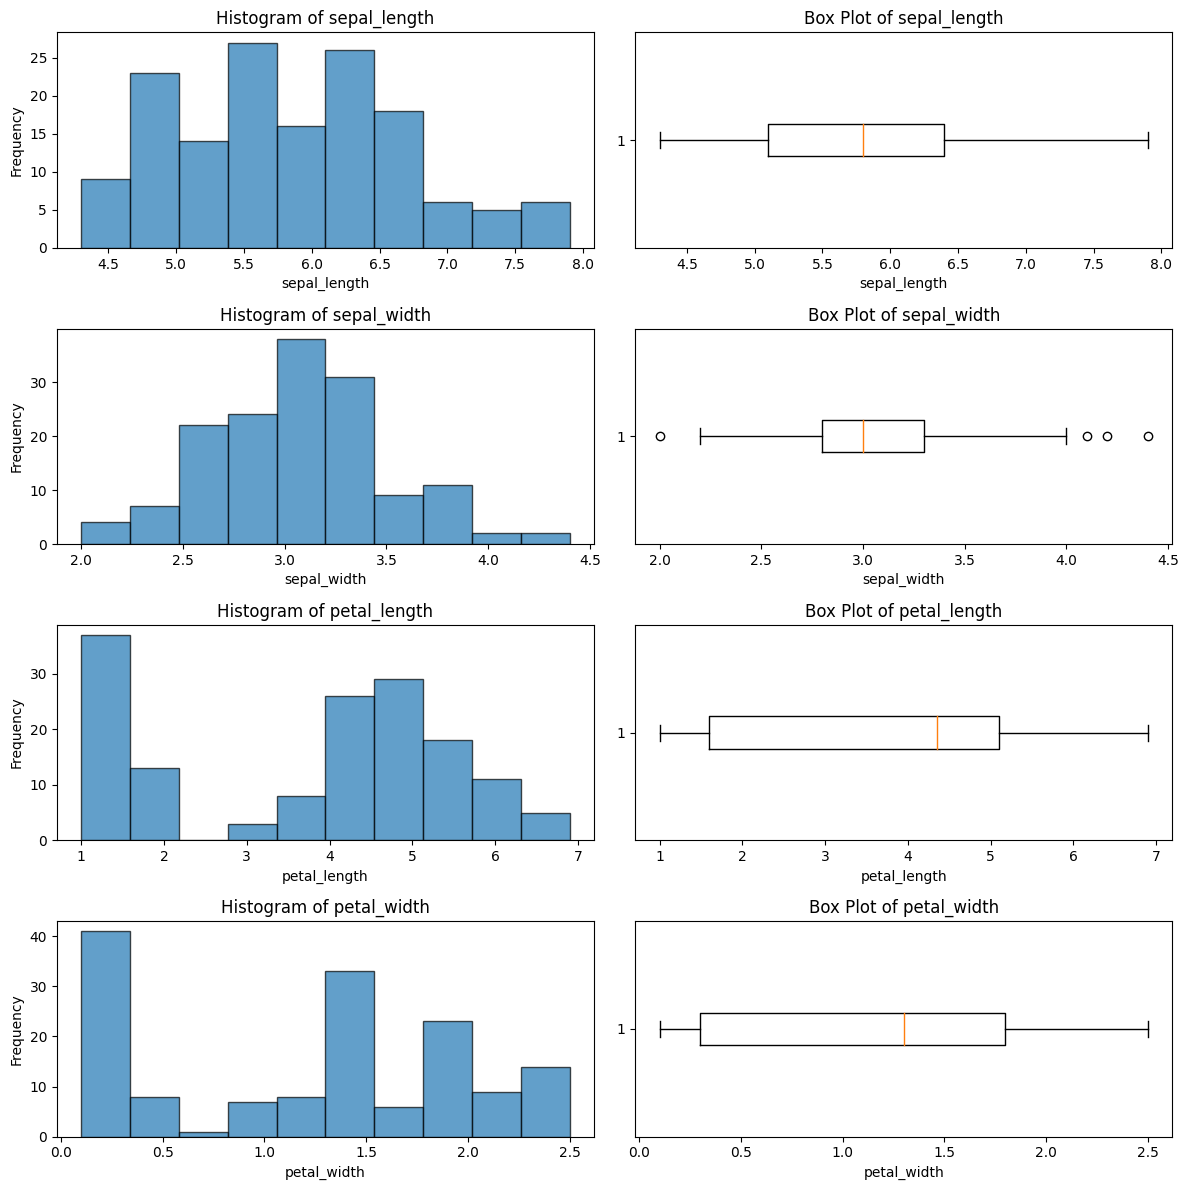

In [ ]:
import matplotlib.pyplot as plt

numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(12, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, 2*i-1)  # Histogram in the odd-numbered subplots
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(4, 2, 2*i)  # Box plot in the even-numbered subplots
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

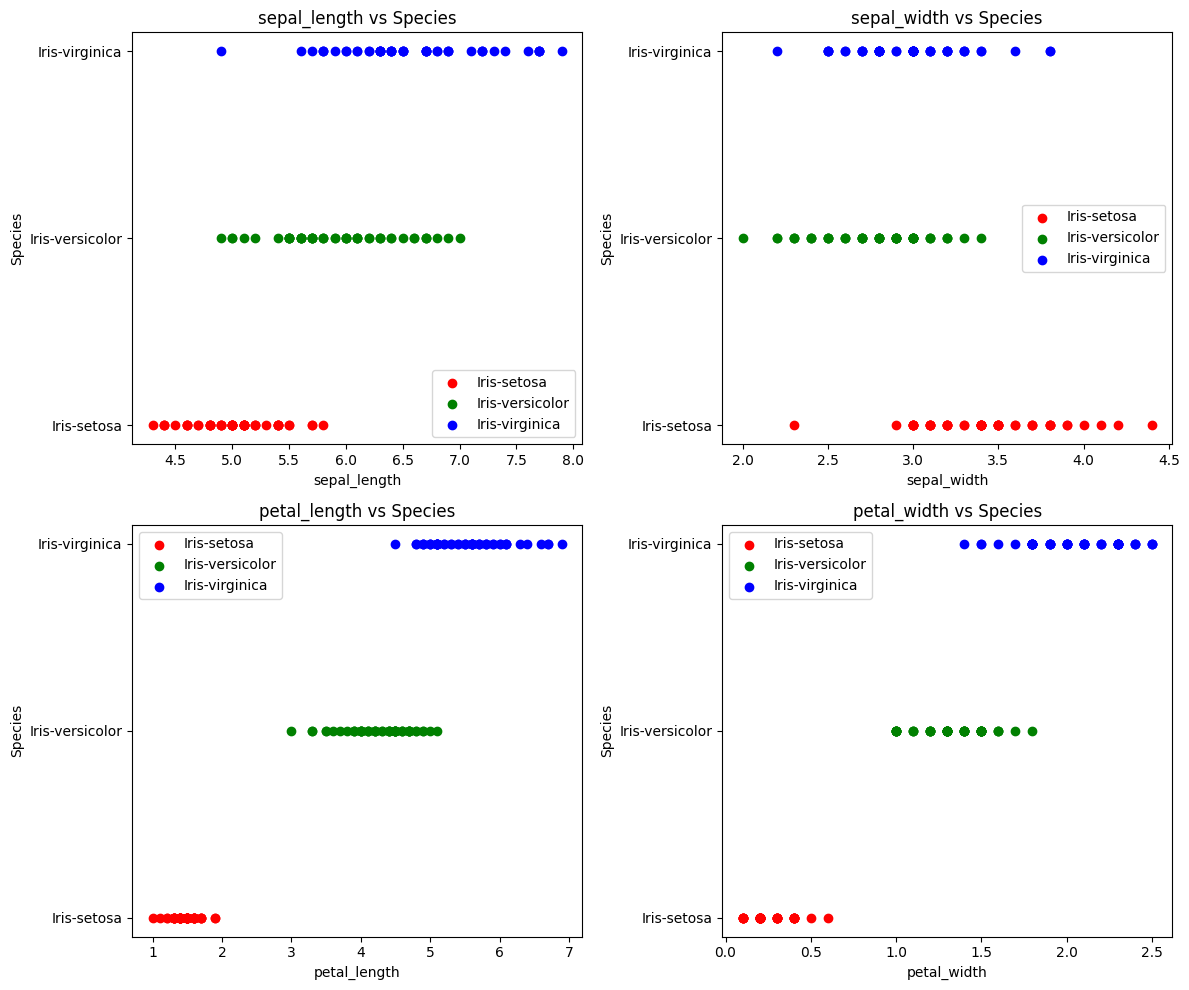

In [ ]:
species_unique = df['species'].unique()
colors = ['r', 'g', 'b']  # Define a color for each species

plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    for j, species in enumerate(species_unique):
        subset = df[df['species'] == species]
        plt.scatter(subset[column], subset['species'], color=colors[j], label=species)
    plt.title(f'{column} vs Species')
    plt.xlabel(column)
    plt.ylabel('Species')
    plt.legend()

plt.tight_layout()
plt.show()

                         sepal_length  sepal_width  petal_length  petal_width  \
sepal_length                 1.000000    -0.109369      0.871754     0.817954   
sepal_width                 -0.109369     1.000000     -0.420516    -0.356544   
petal_length                 0.871754    -0.420516      1.000000     0.962757   
petal_width                  0.817954    -0.356544      0.962757     1.000000   
species_Iris-versicolor      0.079396    -0.464700      0.201587     0.118376   
species_Iris-virginica       0.638020    -0.130901      0.721102     0.769134   

                         species_Iris-versicolor  species_Iris-virginica  
sepal_length                            0.079396                0.638020  
sepal_width                            -0.464700               -0.130901  
petal_length                            0.201587                0.721102  
petal_width                             0.118376                0.769134  
species_Iris-versicolor                 1.000000         

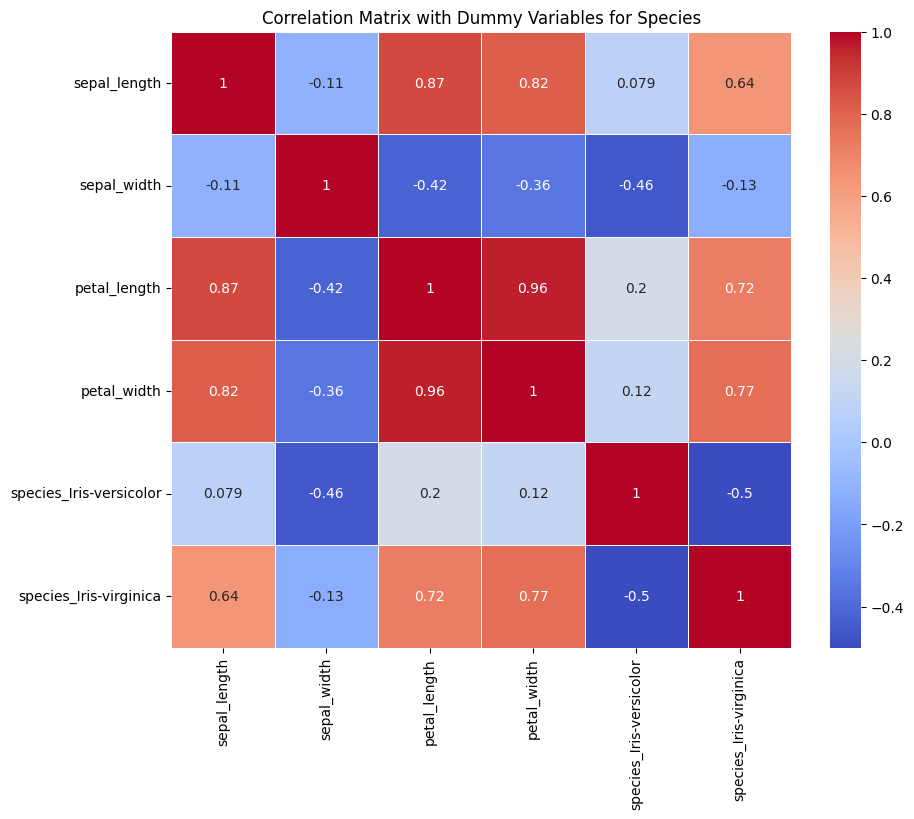

In [ ]:
import seaborn as sns

# Create dummy variables for the 'species' column
df_dummies = pd.get_dummies(df, columns=['species'], drop_first=True)

# Create the correlation matrix
correlation_matrix = df_dummies.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Dummy Variables for Species')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:

X = df.drop(columns=['species'])
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train logistic regression model
logistic_model = LogisticRegression(random_state=42,multi_class='auto', max_iter=1000)
logistic_model.fit(X_train, Y_train)

# Predict on the test set with logistic regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate logistic regression model
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(Y_test, y_pred_logistic)
class_report_logistic = classification_report(Y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Classification Report:\n", class_report_logistic)


Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Train random forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, Y_train)

# Predict on the test set with random forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate random forest model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
class_report_rf = classification_report(Y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Metrics DataFrame:
                 Model  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0  Logistic Regression  0.433333              0.426994           0.433333   
1        Random Forest  0.433333              0.426994           0.433333   

   F1 Score (Weighted)  
0             0.425375  
1             0.425375  



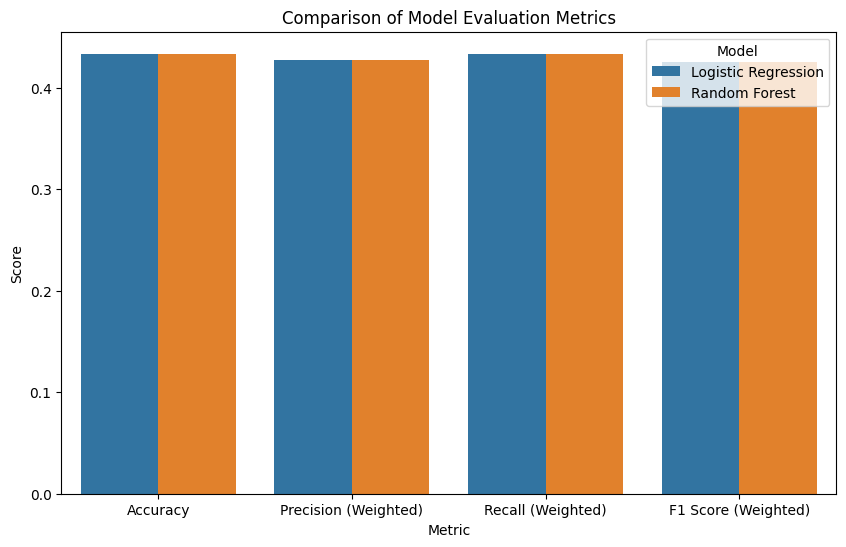

In [ ]:
# Compile evaluation metrics
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_rf)],
    "Precision (Weighted)": [precision_score(y_test, y_pred_logistic, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')],
    "Recall (Weighted)": [recall_score(y_test, y_pred_logistic, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted')],
    "F1 Score (Weighted)": [f1_score(y_test, y_pred_logistic, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
}

metrics_df = pd.DataFrame(metrics)
print("Metrics DataFrame:")
print(metrics_df)
print()

# Display the metrics using a bar plot
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=metrics_melted)
plt.title("Comparison of Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()